# Comment regarding FT income inequality distribution visualizations

The visualization of the income distribution https://twitter.com/RobinKwong/status/810563661945274368 (18 dec 2016) by FT suggests that there is an increase in the income inequality for 1971 - 2014 as,
  - the latter is a broader (with a larger high revenue distribution tail)
  - the absolute hight of the spike of +150 k£ increases

However, while there is has been increase in the income inequality in UK and US (cf evolution of the Gini index), this visualiation is inconclusive because,
  - at constant income inequality, the widening of the hight revenue distribution tail can be compensated by the increase of the mean/median income 
  - the +150 k£ spike is purely a visualization artifact,
  
Here is a counterexample,

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
import matplotlib as mpl
#mpl.rc("savefig", dpi=300)

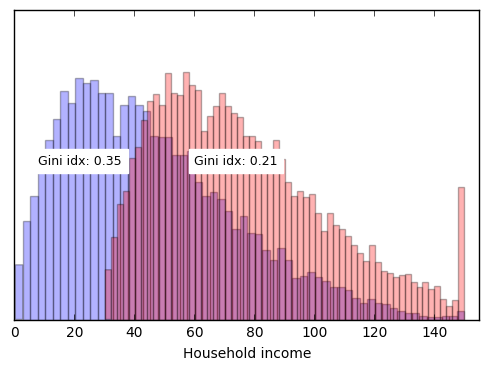

In [2]:
N_hist = 60
threashold = 150

def gini(x):
    # http://stackoverflow.com/a/39513799/1791279

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

y = np.random.beta(1.8, 6, size=10000)
y *= 200
fig, ax = plt.subplots(1,1, dpi=300)

ax.text(8, 0.010, 'Gini idx: {:.2f}'.format(gini(y)), size=9, backgroundcolor='w')
_ = ax.hist(np.fmin(y, threashold), N_hist, normed=True, alpha=0.3, color='b')

y += 30
ax.text(60, 0.010, 'Gini idx: {:.2f}'.format(gini(y)), size=9, backgroundcolor='w')
_ = ax.hist(np.fmin(y, threashold), N_hist, normed=True, alpha=0.3, color='r')
ax.set_xlim(0, 155)
ax.set_ylim(0, 0.02)
ax.set_xlabel('Household income')
ax.yaxis.set_visible(False)